In [1]:
# Loading the libraries
import pandas as pd #Dataframe managemenr
import numpy as np #Basic Computations
import matplotlib.pyplot as plt #Visualization


In [2]:
#Reading input file
df = pd.read_csv('E:/Exam/dataset/dataset.csv') 

C:\Users\dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,RowID,Joblevel,DistancetoHome,istrain,FrequencyofTravel,Gender,OfficeAmbienceRating,MonthlyRate,YearsSinceLastPromotion,SelfMotivationRating,...,ExtraTime,FirstJobDate,EmployeeID,Happynesslevelinjob,DateOfjoiningintheCurrentCompany,ESOps,MonthlyIncome,Specialization,PerformanceRating,MaritalStatus
0,1,1,3,1,Less,Female,3,9964,0,4,...,No,7/27/2002,10,1,5/29/2013,3,2670,Medical,4,Married
1,2,2,15,1,Less,Female,4,12682,0,2,...,No,5/25/2004,15,3,4/21/2005,0,4193,Life Sciences,3,Single
2,3,1,24,1,Less,Male,3,12947,0,2,...,No,4/22/2008,19,3,4/28/2010,0,2028,Life Sciences,3,Single
3,4,1,5,1,Less,Male,1,15053,0,4,...,Yes,6/22/2007,21,2,7/30/2008,2,3298,Life Sciences,3,Divorced
4,5,1,2,1,Less,Male,4,4306,1,3,...,No,7/26/2008,24,4,6/21/2011,0,3944,Life Sciences,3,Single


In [4]:
# Feature transformation on some columns. Check whether it is helpful or not
#df.MonthlyIncome = np.log(df.MonthlyIncome)


count    50341.000000
mean      5857.831310
std       4341.123001
min       1074.000000
25%       2826.000000
50%       4285.000000
75%       6852.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64


C:\Users\dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


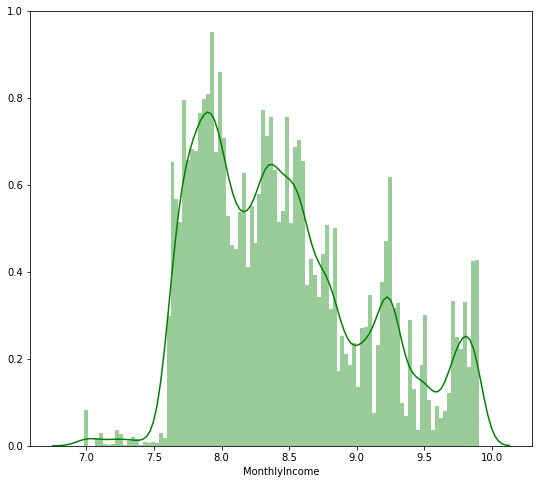

In [5]:
import seaborn as sns
print(df['MonthlyIncome'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(np.log(df['MonthlyIncome']), color='g', bins=100, hist_kws={'alpha': 0.4});

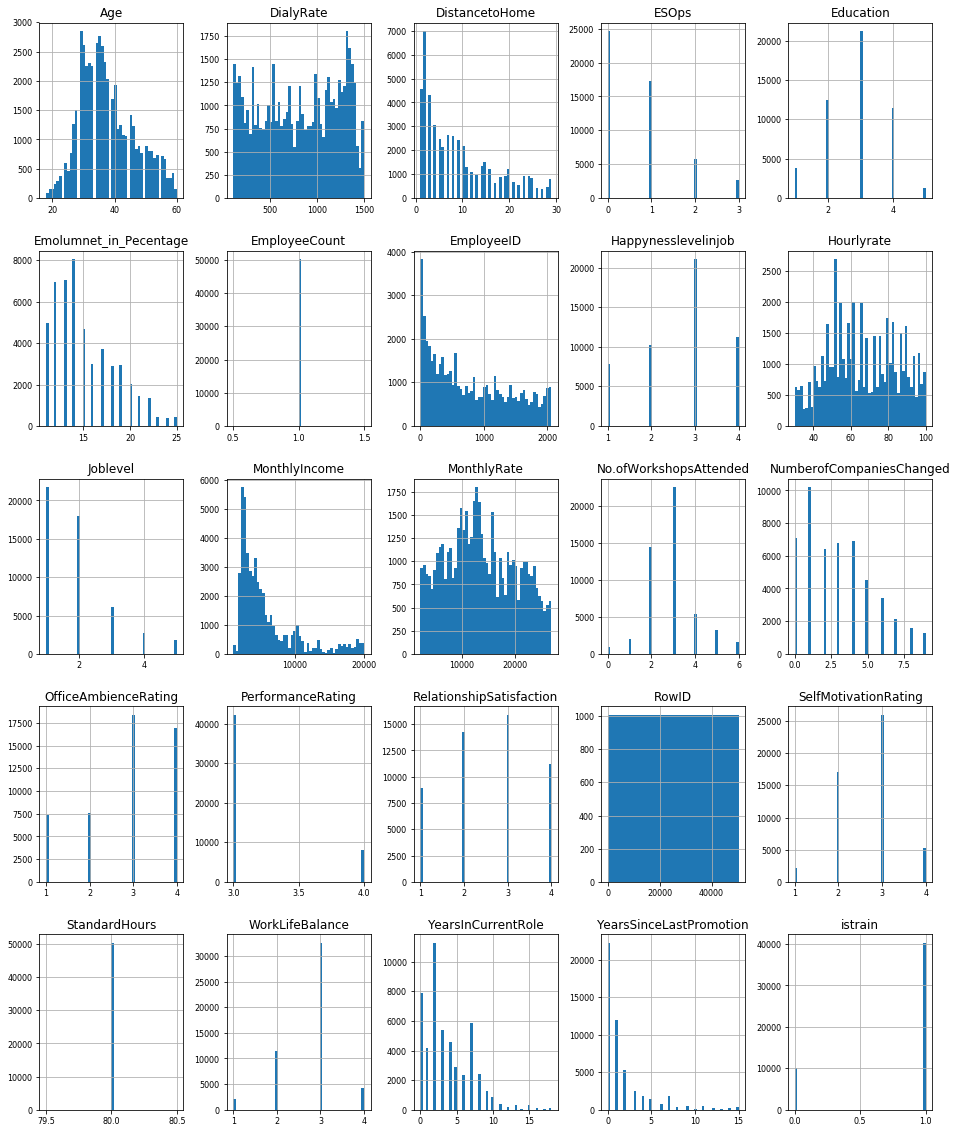

In [6]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations


In [7]:
# Calculated total number of days of job
df.FirstJobDate = pd.to_datetime(df.FirstJobDate,infer_datetime_format=False)
df.datacollected = pd.to_datetime(df.datacollected,infer_datetime_format=False)
df['DaysWorked'] = (df.FirstJobDate - df.datacollected)/np.timedelta64(-1, 'D')

# Calculated total number of days of job in a current company
df.DateOfjoiningintheCurrentCompany = pd.to_datetime(df.DateOfjoiningintheCurrentCompany,infer_datetime_format=False)
df['DaysWorkedinCurrentCompany'] = (df.DateOfjoiningintheCurrentCompany - df.datacollected)/np.timedelta64(-1, 'D')

In [8]:
# Printing all columns 
df.columns

Index(['RowID', 'Joblevel', 'DistancetoHome', 'istrain', 'FrequencyofTravel',
       'Gender', 'OfficeAmbienceRating', 'MonthlyRate',
       'YearsSinceLastPromotion', 'SelfMotivationRating', 'Division', 'Over18',
       'Hourlyrate', 'JobRole', 'RelationshipSatisfaction', 'Education',
       'No.ofWorkshopsAttended', 'EmployeeCount', 'datacollected', 'Age',
       'YearsInCurrentRole', 'NumberofCompaniesChanged', 'WorkLifeBalance',
       'Emolumnet_in_Pecentage', 'DialyRate', 'StandardHours', 'ExtraTime',
       'FirstJobDate', 'EmployeeID', 'Happynesslevelinjob',
       'DateOfjoiningintheCurrentCompany', 'ESOps', 'MonthlyIncome',
       'Specialization', 'PerformanceRating', 'MaritalStatus', 'DaysWorked',
       'DaysWorkedinCurrentCompany'],
      dtype='object')

In [9]:
#Keeping row ID to append in submission file
RowID =  df[(df.istrain == 0)].RowID

#removed date columns
DateColumns = ['datacollected','FirstJobDate','DateOfjoiningintheCurrentCompany','RowID'] 
df = df.drop(DateColumns,1)

#Converted Categorical columns to Dummies
CategoricalColumns = ['FrequencyofTravel','Gender','Division','JobRole','Specialization','MaritalStatus','Over18']
temp = df[CategoricalColumns]
CategoricalDf = pd.get_dummies(temp)
df = df.drop(CategoricalColumns,1)
df = pd.concat([df.reset_index(drop=True), CategoricalDf], axis=1)

In [10]:
#Splited data into train and test based on istrain Flag
train = df[(df.istrain == 1)]
test = df[(df.istrain == 0)]


In [11]:
#Converted Label to Binary Format ex: Yes, No to 1, 0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train.ExtraTime)
train.ExtraTime = encoder.transform(train.ExtraTime)



C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [12]:
#Priniting shape of dataframe which will use to choose to decide input dim
train.shape

(40303, 54)

In [13]:
#Split the train data into train and validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('ExtraTime',1), train.ExtraTime, test_size=0.20, random_state=42)

In [14]:
# Grid Search. Comment this section if you have decided parameters already
'''
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from xgboost.sklearn import XGBClassifier

param_test1 = {
 'max_depth':[5,25,100],
 'min_child_weight':[4,5,6],
 'subsample':[0.3,0.5,0.9]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=2)
gsearch1.fit(X_train, y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_
'''

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


KeyboardInterrupt: 

In [ ]:
#Building XGB Classification model with tunned parameters
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=5,subsample=0.9)
model.fit(X_train, y_train)

In [ ]:
#printing the feature importance
from xgboost import plot_importance
%matplotlib inline

plot_importance(model)
plt.show()

In [ ]:
#predicting on validation set
pred = model.predict(X_test)

In [ ]:
#Printing Accuracy
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test, pred)
print('Accuracy of model on validation set is ',Accuracy)

In [ ]:
#Printing F1 Score
from sklearn.metrics import f1_score
F1 = f1_score(y_test, pred, average='macro')
print('F1 score of model on validation set is ',F1)

In [ ]:
#ROC curve plot

from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#predicting on final test set
test = test.drop('ExtraTime',1)
TestPred = model.predict(test)

In [ ]:
#Inverse of Label Encode
TestPred = encoder.inverse_transform(TestPred)

In [ ]:
#Creating a submission dataframe
d = {'RowID': RowID}
Output = pd.DataFrame(data=d)
Output['ExtraTime'] = TestPred

In [ ]:
Output.head()

In [ ]:
#saving output file in a comma seperated format file.
Output.to_csv('predictions.csv',index=False)